# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [5]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


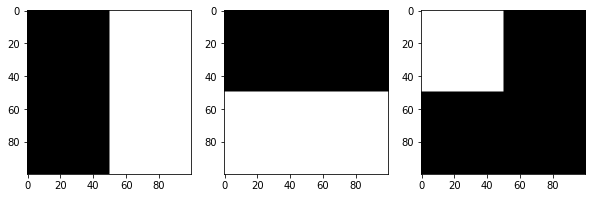

In [6]:
# solution

img1 = np.zeros((100,100), dtype=np.uint8)
img1[:,50:100]=255;
img2 = np.zeros((100,100), dtype=np.uint8)
img2[50:100,:]=255;
img3 = np.zeros((100,100), dtype=np.uint8)
img3[0:50,0:50]=255;

f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(10,10))
axarr[0].imshow(img1, cmap='gray')
axarr[1].imshow(img2, cmap='gray')
axarr[2].imshow(img3, cmap='gray')
plt.show()

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

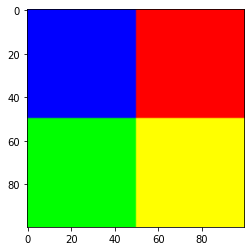

In [7]:
# solution

img_cl = np.zeros((100,100,3), dtype=np.uint8)

img_cl[:,:,0] = img1;
img_cl[:,:,1] = img2;
img_cl[:,:,2] = img3;
plt.imshow(img_cl) 
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



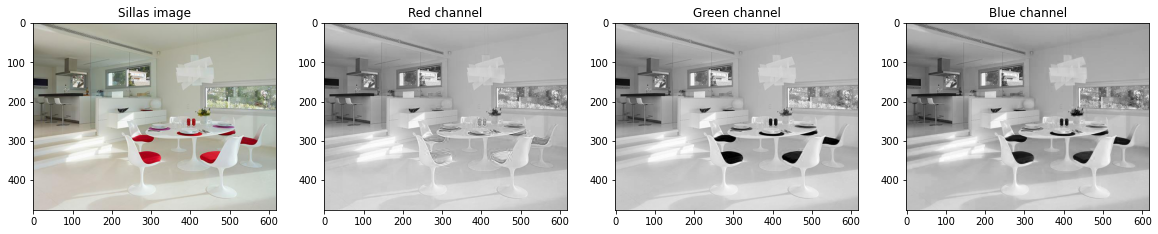

In [8]:
# solution

img = io.imread('/content/drive/MyDrive/2122_CV_Practicals/P02_04_oct_2021_operators_and_filters/images/sillas.jpg')

R = img[:, :, 0];
G = img[:, :, 1];
B = img[:, :, 2];

f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(20, 10))
axarr[0].imshow(img, cmap='gray')
axarr[0].set_title('Sillas image')
axarr[1].imshow(R, cmap='gray')
axarr[1].set_title('Red channel')
axarr[2].imshow(G, cmap='gray')
axarr[2].set_title('Green channel')
axarr[3].imshow(B, cmap='gray')
axarr[3].set_title('Blue channel')
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

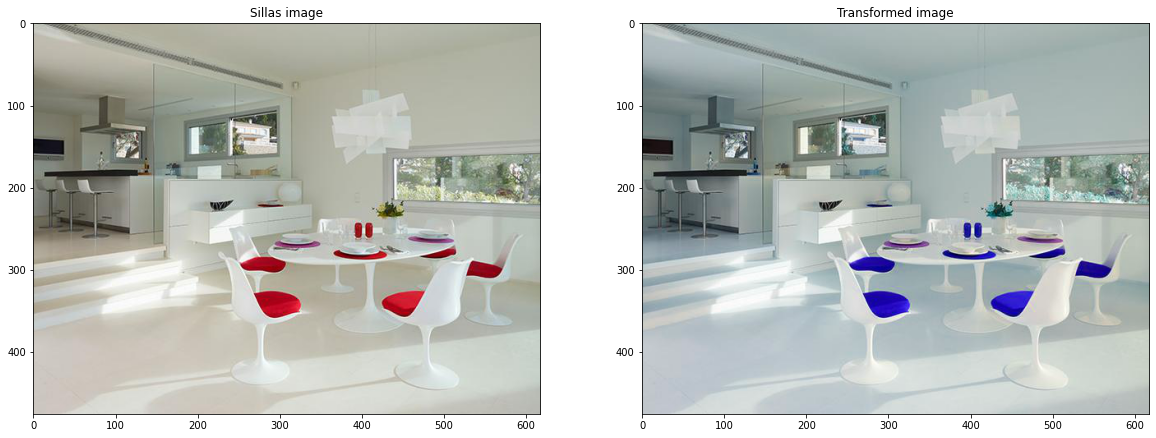

In [9]:
# solution

img2 = img.copy()
tmp = img2[:, :, 0].copy() # It is necessary to use copy to get it right!!!
img2[:, :, 0] = img2[:, :, 2]
img2[:, :, 2] = tmp

f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(20, 10))
axarr[0].imshow(img, cmap='gray')
axarr[0].set_title('Sillas image')
axarr[1].imshow(img2, cmap='gray')
axarr[1].set_title('Transformed image')
plt.show()

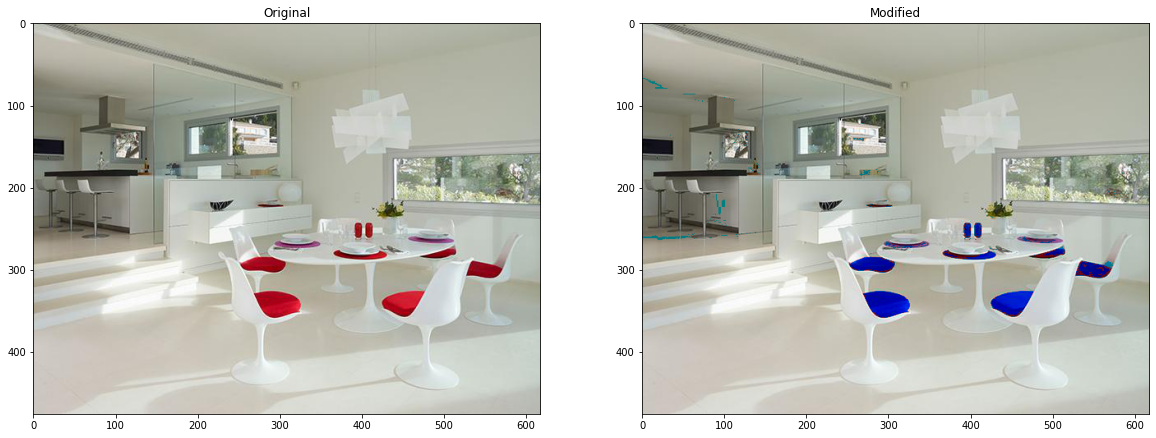

In [10]:
# solution - 2

#Get a mask of values where only reds are high (to avoid changing whites)
pos_r = np.where((img[:,:,0] > 128) & (img[:,:,2] < 128) & (img[:,:,1] < 128))

#Set the blue values to the corresponding values in the red channel.
new_sillas=img.copy()
new_sillas[pos_r[0], pos_r[1], 2] = new_sillas[pos_r[0], pos_r[1], 0]

#Set the pure red values to zero
new_sillas[pos_r[0], pos_r[1], 0] = 0

plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(new_sillas)
plt.title('Modified')

plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


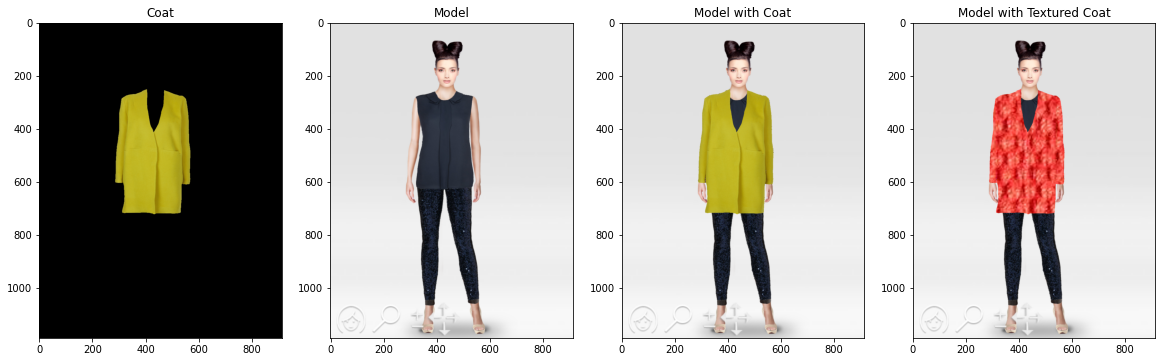

In [11]:
# solution

coat = io.imread('/content/drive/MyDrive/2122_CV_Practicals/P02_04_oct_2021_operators_and_filters/images/coat.png')
model = io.imread('/content/drive/MyDrive/2122_CV_Practicals/P02_04_oct_2021_operators_and_filters/images/model.png')
texture = io.imread('/content/drive/MyDrive/2122_CV_Practicals/P02_04_oct_2021_operators_and_filters/images/texture2.png')

f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(20, 10))
axarr[0].imshow(coat, cmap='gray')
axarr[0].set_title('Coat')
axarr[1].imshow(model, cmap='gray')
axarr[1].set_title('Model')

msk = coat > 0
model[msk] = coat[msk]

axarr[2].imshow(model, cmap='gray')
axarr[2].set_title('Model with Coat')

coat_texture = coat[:,:,0:3]
model2 = model[:,:,0:3]

msk = coat_texture > 0

coat_texture[msk] = texture[msk]
model2[msk] = coat_texture[msk]

axarr[3].imshow(model2, cmap='gray')
axarr[3].set_title('Model with Textured Coat')

plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




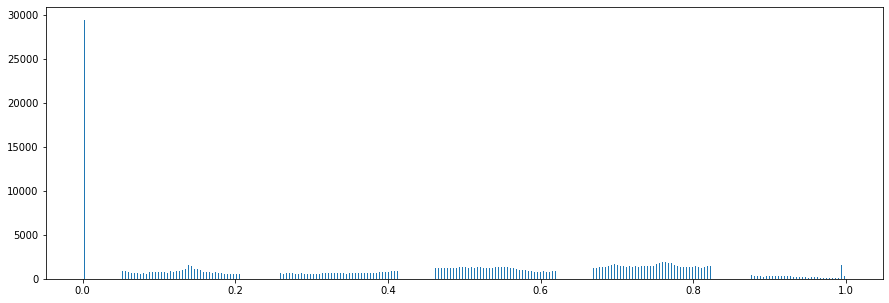

In [12]:
# solution

image = data.astronaut()
image = color.rgb2gray(image)

hist, bin_centers = exposure.histogram(image)

plt.figure(figsize=(15, 5))
plt.bar(bin_centers, hist, width=0.001)
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

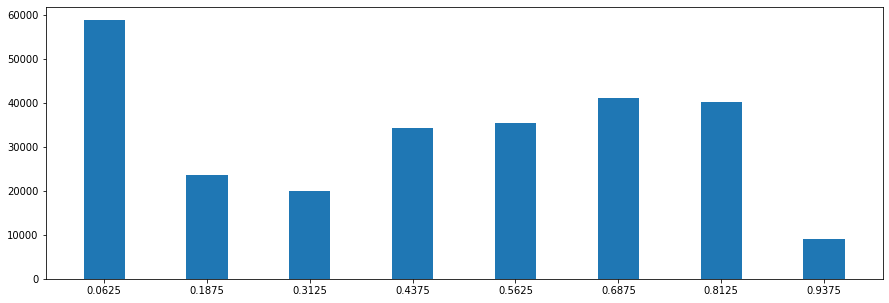

In [13]:
# solution

hist, bin_centers = exposure.histogram(image, nbins=8)

plt.figure(figsize=(15, 5))
plt.bar(bin_centers, hist, width=0.05, tick_label=bin_centers)
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

1. Yes, the inference changes. Because when the nbins was 8, the curve was more flatter and more details can be inferred from the histogram with nbins as 256.
2. If there are too many bins, then the data distribution will look rough and it will be difficult to discern the signal from the noise. If there are two fews bins, the histogram will lack the details needed to discern any useful pattern from the data.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


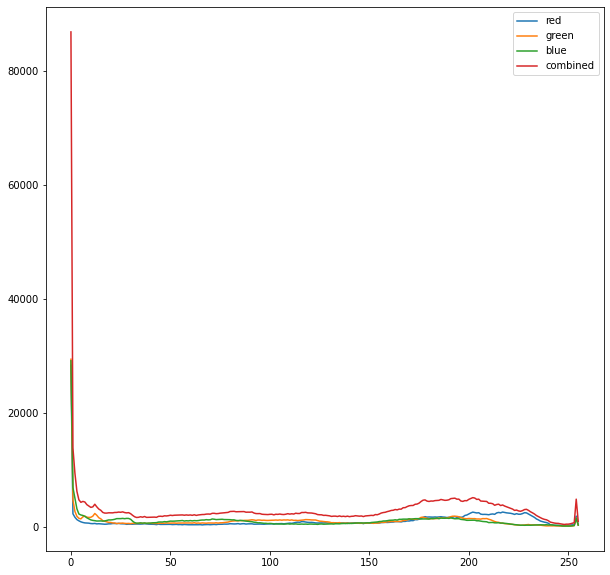

In [14]:
#solution

image = data.astronaut()

R = image[:, :, 0];
G = image[:, :, 1];
B = image[:, :, 2];

hist_r, bin_centers_r = exposure.histogram(R)
hist_g, bin_centers_g = exposure.histogram(G)
hist_b, bin_centers_b = exposure.histogram(B)

plt.figure(figsize=(10, 10))
plt.plot(hist_r, label='red')
plt.plot(hist_g, label='green')
plt.plot(hist_b, label='blue')
plt.plot(hist_r + hist_g + hist_b, label='combined')

plt.legend()

plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



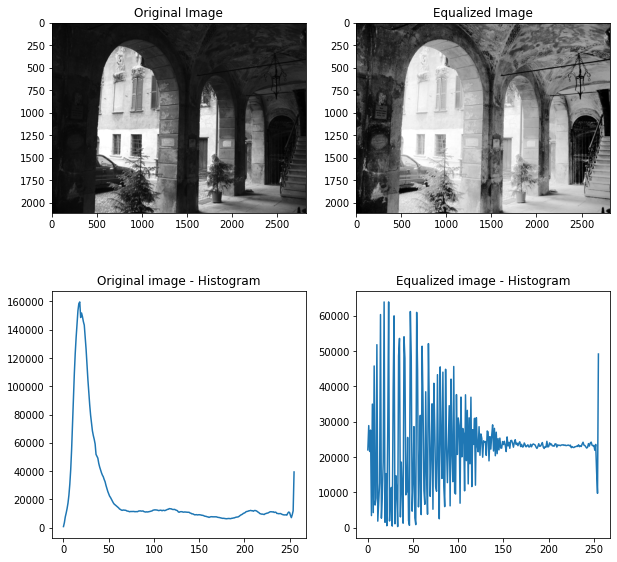

In [15]:
# solution

image = io.imread('/content/drive/MyDrive/2122_CV_Practicals/P02_04_oct_2021_operators_and_filters/images/aquatermi_lowcontrast.jpg')
image = color.rgb2gray(image)
hist, bin_centers = exposure.histogram(image)

image_eq = exposure.equalize_hist(image)
hist_eq, bin_centers_eq = exposure.histogram(image_eq)

f, axarr = plt.subplots(ncols=2, nrows=2,figsize=(10,10))
axarr[0][0].imshow(image, cmap='gray')
axarr[0][0].set_title('Original Image')
axarr[0][1].imshow(image_eq, cmap='gray')
axarr[0][1].set_title('Equalized Image')
axarr[1][0].plot(hist)
axarr[1][0].set_title('Original image - Histogram')
axarr[1][1].plot(hist_eq)
axarr[1][1].set_title('Equalized image - Histogram')
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

https://stackoverflow.com/questions/41118808/difference-between-contrast-stretching-and-histogram-equalization

https://www.ques10.com/p/5967/compare-between-contract-stretching-and-histogra-1/

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [16]:
# solution

def linear_contrast_strech(img, bin_count=256, pmin=0, pmax=100):
    lower_trgt = 0
    upper_trgt = lower_trgt + bin_count-1
    upper_img = np.percentile(img, pmax)
    lower_img = np.percentile(img, pmin)
    result = (img - lower_img)*((upper_trgt - lower_trgt)/(upper_img - lower_img)) + lower_trgt
    #saturate values out of the range
    result[result<lower_trgt] = lower_trgt
    result[result>upper_trgt] = upper_trgt
    return result

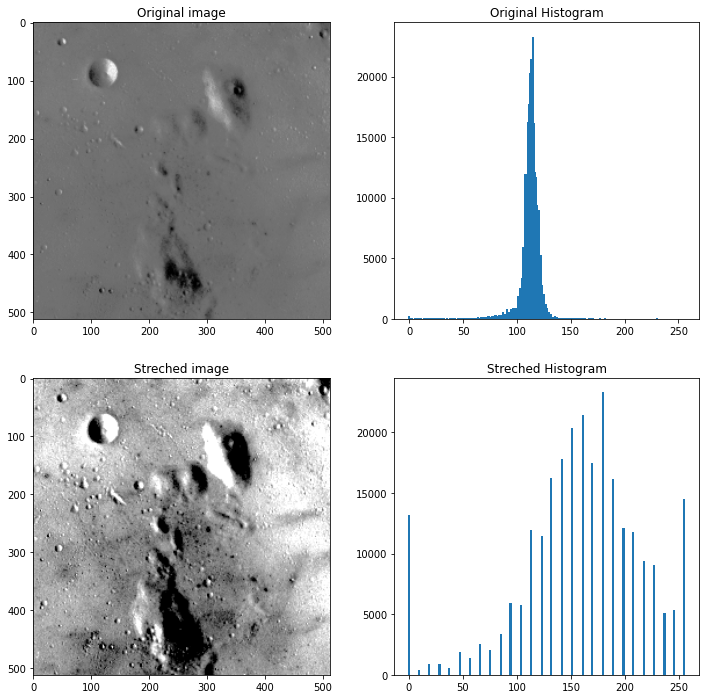

In [17]:
# solution

original = data.moon()
streched = linear_contrast_strech(original, 256, 5, 95)

[hist_original, centers_original] = exposure.histogram(original, nbins=256)
[hist_streched, centers_streched] = exposure.histogram(streched, nbins=256)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize = (12,12))

ax1.imshow(original, cmap='gray')
ax1.title.set_text('Original image')
ax2.bar(centers_original, hist_original, width = 2)
ax2.title.set_text('Original Histogram')

ax3.imshow(streched, cmap='gray')
ax3.title.set_text('Streched image')
ax4.bar(centers_streched, hist_streched, width = 2)
ax4.title.set_text('Streched Histogram')

plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




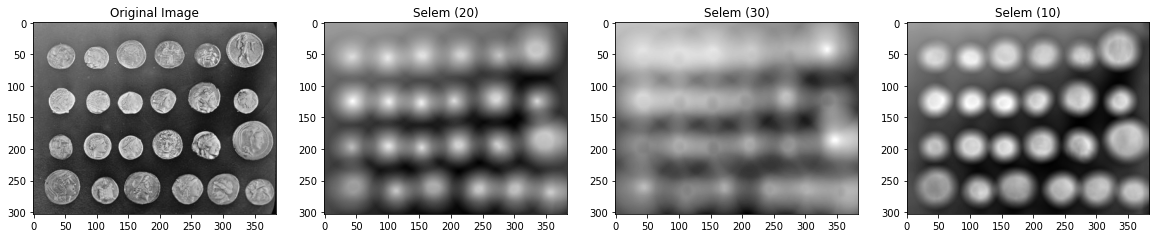

In [18]:
# solution

image = data.coins()

selem20 = morphology.disk(20)
mean_image_20 = filters.rank.mean(image, selem20)

selem30 = morphology.disk(30)
mean_image_30 = filters.rank.mean(image, selem30)

selem10 = morphology.disk(10)
mean_image_10 = filters.rank.mean(image, selem10)

f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(20, 10))
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[1].imshow(mean_image_20, cmap='gray')
axarr[1].set_title('Selem (20)')
axarr[2].imshow(mean_image_30, cmap='gray')
axarr[2].set_title('Selem (30)')
axarr[3].imshow(mean_image_10, cmap='gray')
axarr[3].set_title('Selem (10)')
plt.show()

*   Use different selem (disk, square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x 5 subplot to show the selem in the first row and the corresponding smoothened image in the second row.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: 'height' is a deprecated argument name for `rectangle`. It will be removed in version 0.20.0. Please use 'ncols' instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: 'width' is a deprecated argument name for `rectangle`. It will be removed in version 0.20.0. Please use 'nrows' instead.


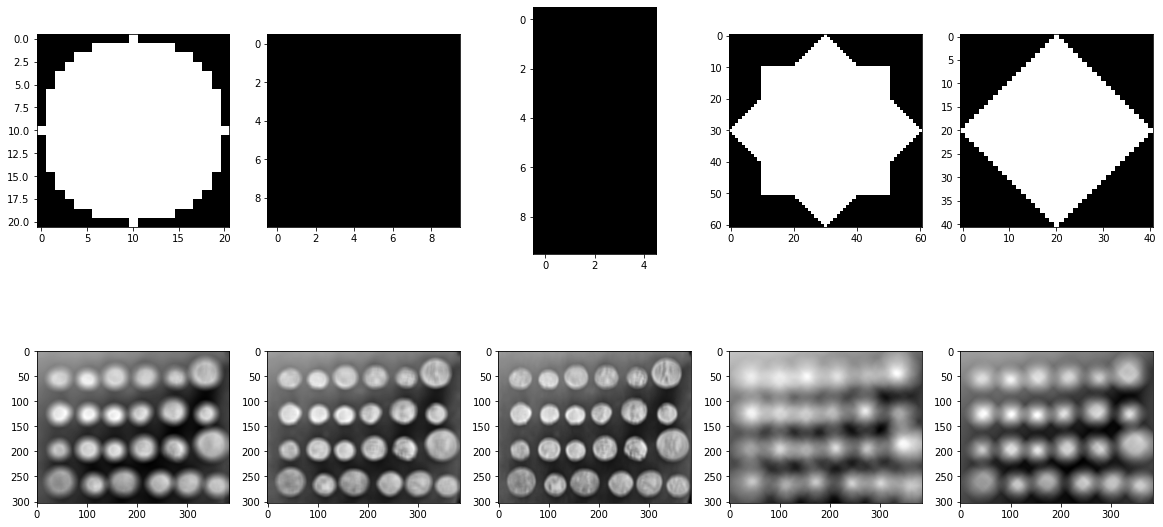

In [19]:
# solution

image = data.coins()

f, ax = plt.subplots(ncols=5, nrows=2,figsize=(20, 10))

selem = morphology.disk(radius=10)
coin_filtered = filters.rank.mean(image, selem=selem)
ax[0,0].imshow(selem, cmap='gray')
ax[1,0].imshow(coin_filtered, cmap='gray')

selem = morphology.square(width=10)
coin_filtered = filters.rank.mean(image, selem=selem)
ax[0,1].imshow(selem, cmap='gray')
ax[1,1].imshow(coin_filtered, cmap='gray')

selem = morphology.rectangle(width=10, height=5)
coin_filtered = filters.rank.mean(image, selem=selem)
ax[0,2].imshow(selem, cmap='gray')
ax[1,2].imshow(coin_filtered, cmap='gray')

selem = morphology.star(a=20)
coin_filtered = filters.rank.mean(image, selem=selem)
ax[0,3].imshow(selem, cmap='gray')
ax[1,3].imshow(coin_filtered, cmap='gray')

selem = morphology.diamond(radius=20)
coin_filtered = filters.rank.mean(image, selem=selem)
ax[0,4].imshow(selem, cmap='gray')
ax[1,4].imshow(coin_filtered, cmap='gray')

plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Larger structuring element preserves larger details whereas small structuring element preserves finer details


*   What is the observed behaviour with difference in the structuring element?



**Solution**

the overall selection of a structuring element depends upon the geometric shapes you are attempting to extract from the image data



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

https://web.stanford.edu/class/cs279/notes/image-analysis-notes.pdf

https://stackoverflow.com/questions/31131672/difference-between-mean-and-gaussian-filter-in-result

https://intellipaat.com/community/7714/difference-between-mean-and-gaussian-filter-in-result